# EDA i Modele klasyfikacji cukrzycy

In [2]:
import pandas as pd
import numpy as np
import os, os.path as op

import matplotlib.pyplot as plt
import seaborn as sns
 

In [3]:
data = pd.read_csv(op.join('diabetes', 'diabetes_full.csv'), sep =',')

## EDA


In [4]:
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
data.shape

(253680, 22)

Dataset zawiera 253 680 rekordów i 22 kolumny.

In [6]:
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [7]:
data.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

W zbiorze danych nie ma braków danych, ale na dalszych etapach sprawdzę czy wszytkie dane są faktycznie poprawne.

### Label

In [8]:
data.Diabetes_012.unique()

array([0., 2., 1.])

W pierwszej kolumnie znajduje się numer każdej z trzech klas:
-   braku cukrzycy
-   zagrożenia cukrzycą
-   cukrzycy

In [9]:
data.rename(columns={'Diabetes_012' : 'label'}, inplace = True)

In [10]:
data.label.value_counts()/data.label.count()

0.0    0.842412
2.0    0.139333
1.0    0.018255
Name: label, dtype: float64

Zdecydowana większość danych dotyczy osób bez cukrzycy tj. 84%. Przypadki osób w stanie przedcukrzycowym i chorych na cukrzyce stanowią około 16% procent zbioru danych. Osoby chore na cukrzyce to niecałe 2 % zbioru.

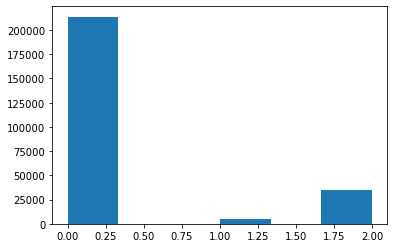

In [11]:
plt.hist(data.label, bins = 6);

### HighBP

Miara wysokiego ciśnienia:
-   0 = ciśnienie w normie
-   1 = ciśnienie podwyższone

In [12]:
data.HighBP.unique()

array([1., 0.])

In [13]:
data.HighBP.value_counts()/data.HighBP.count()

0.0    0.570999
1.0    0.429001
Name: HighBP, dtype: float64

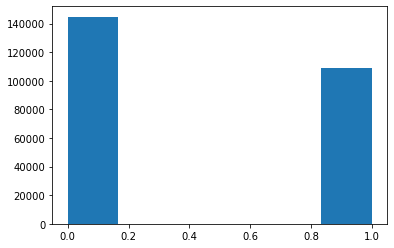

In [14]:
plt.hist(data.HighBP, bins = 6);

### HighChol


Wskaźnik wysokości chlesterolu:
-   0  = w normie
-   1 = podwyższony

In [15]:
data.HighChol.unique()

array([1., 0.])

In [16]:
data.HighChol.value_counts()/data.HighChol.count()

0.0    0.575879
1.0    0.424121
Name: HighChol, dtype: float64

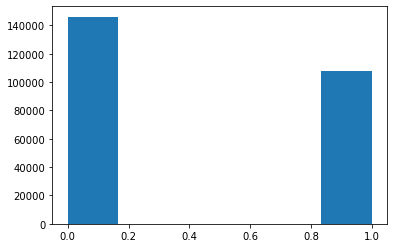

In [17]:
plt.hist(data.HighChol, bins = 6);

### CholCheck

### BMI

### Smoker 

### Stroke

### HeartDiseaseorAttack

### PhysActivity

### Fruits

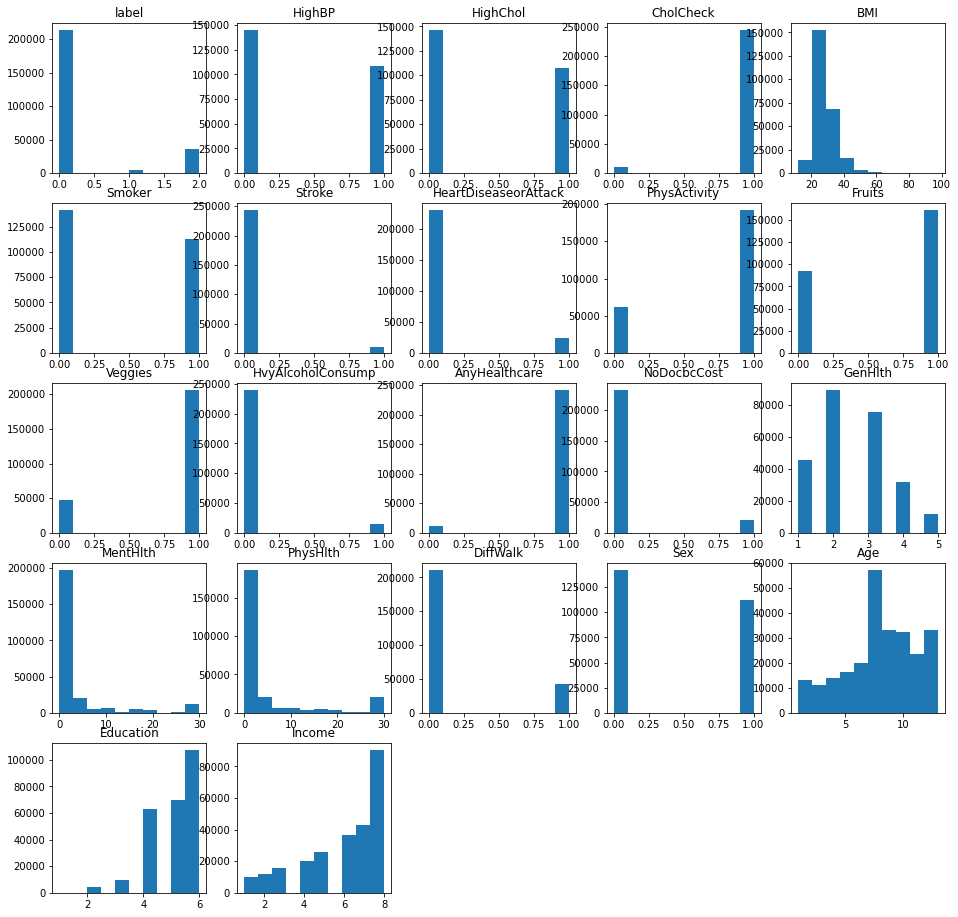

In [18]:
plt.figure(figsize=(16,16))
for index, column in enumerate(data):
  plt.subplot(5,5, index+1)
  plt.title(column)
  plt.hist(data[column])
plt.show()

## Sklearn model


### MODEL #1


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

In [20]:
x = data.iloc[:,1:]
y = data.label

In [21]:
x.head(3)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0


In [22]:
y.unique()

array([0., 2., 1.])

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

scaler = StandardScaler()
clf = DecisionTreeClassifier()
pipe = Pipeline([('Standard scaler' ,scaler),('Decision_Tree_Classifier',clf)])

params = {'Decision_Tree_Classifier__max_depth' : [10 , 50 , 80 , 120]}

tuning = RandomizedSearchCV(pipe, param_distributions=params, random_state=42)
tuning.fit(x_train,y_train)

best = tuning.best_estimator_
predictions = best.predict(x_test)

c:\Users\ja\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Accuracy score = 0.8462038789025544


c:\Users\ja\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


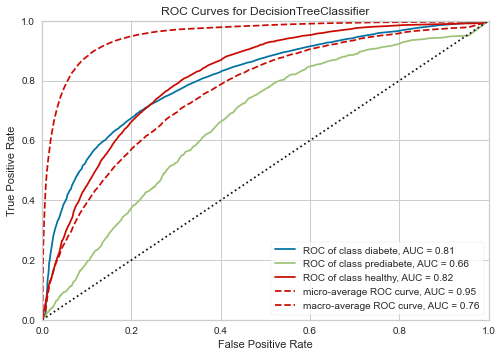

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [24]:
from yellowbrick import ROCAUC
print(f'Accuracy score = {accuracy_score(y_test, predictions)}')

roc = ROCAUC(best, classes=['diabete', 'prediabete', 'healthy'])
roc.fit(x_train,y_train)
roc.score(x_test,y_test)
roc.show()

c:\Users\ja\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


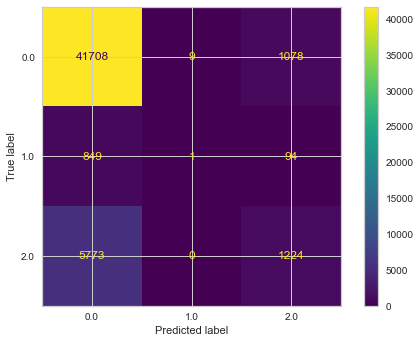

In [25]:
plot_confusion_matrix(best, x_test, y_test)

### MODEL #2

In [26]:
from sklearn.neighbors import KNeighborsClassifier  

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

scaler = StandardScaler()
clf = KNeighborsClassifier()
pipe = Pipeline([('Standard scaler' ,scaler),('kn',clf)])

params = {'kn__leaf_size' : [10 , 30 , 50,80]}

tuning = RandomizedSearchCV(pipe, param_distributions=params, random_state=42)
tuning.fit(x_train,y_train)

best = tuning.best_estimator_
predictions = best.predict(x_test)

c:\Users\ja\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Accuracy score = 0.8303177231157364


c:\Users\ja\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


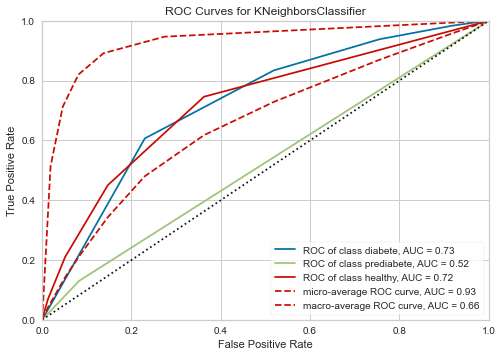

<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [28]:
print(f'Accuracy score = {accuracy_score(y_test, predictions)}')
roc = ROCAUC(best, classes=['diabete', 'prediabete', 'healthy'])
roc.fit(x_train,y_train)
roc.score(x_test,y_test)
roc.show()

c:\Users\ja\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


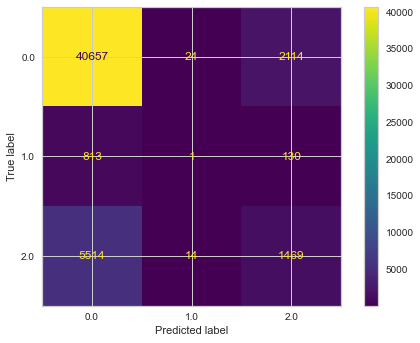

In [29]:
plot_confusion_matrix(best, x_test, y_test)

## ANN


In [30]:
import tensorflow as tf